In [ ]:
#Paso 1. conectarse con google colab
from google.colab import drive
drive.mount('/content/drive')
#!/usr/bin/env python

Mounted at /content/drive


In [ ]:
#Importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/DATASET/train'
SIZE = (240, 240)

In [ ]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['rottenoranges', 'freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana']


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.10)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9822 images belonging to 6 classes.
Found 1089 images belonging to 6 classes.


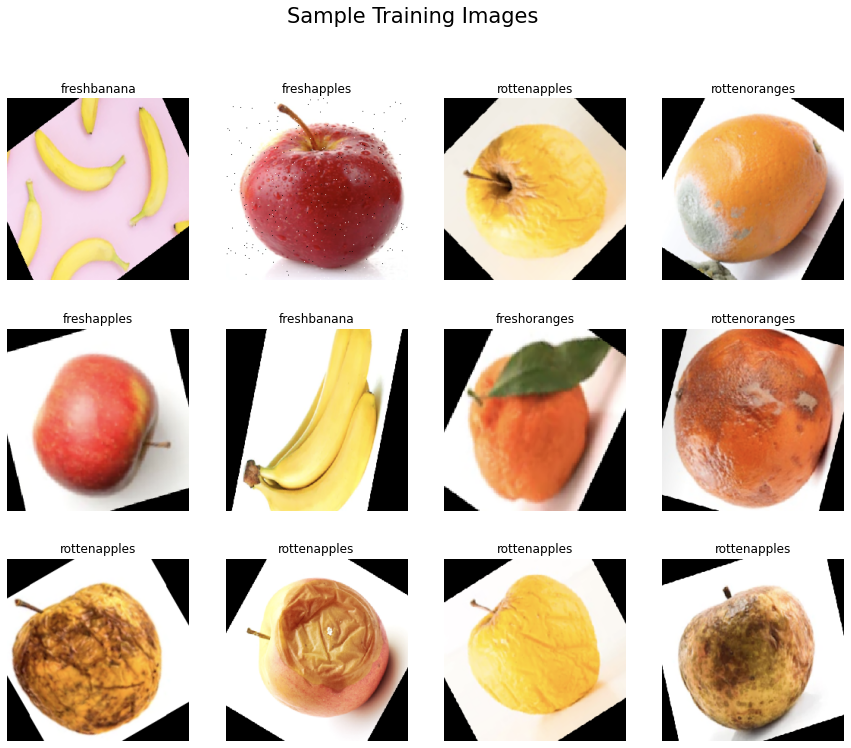

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0

In [ ]:
history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))


<ipython-input-9-734a4e877e8d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))


Epoch 1/12
307/307 [==============================] - 5760s 19s/step - loss: 0.9640 - accuracy: 0.6514 - val_loss: 0.5777 - val_accuracy: 0.7851
Epoch 2/12
307/307 [==============================] - 69s 226ms/step - loss: 0.3386 - accuracy: 0.8805 - val_loss: 0.2960 - val_accuracy: 0.9045
Epoch 3/12
307/307 [==============================] - 69s 226ms/step - loss: 0.2318 - accuracy: 0.9111 - val_loss: 0.1992 - val_accuracy: 0.9440
Epoch 4/12
307/307 [==============================] - 71s 230ms/step - loss: 0.1974 - accuracy: 0.9292 - val_loss: 0.1795 - val_accuracy: 0.9385
Epoch 5/12
307/307 [==============================] - 69s 225ms/step - loss: 0.1470 - accuracy: 0.9443 - val_loss: 0.1503 - val_accuracy: 0.9357
Epoch 6/12
307/307 [==============================] - 70s 226ms/step - loss: 0.1272 - accuracy: 0.9538 - val_loss: 0.1947 - val_accuracy: 0.9247
Epoch 7/12
307/307 [==============================] - 69s 225ms/step - loss: 0.0912 - accuracy: 0.9682 - val_loss: 0.1029 - val_ac

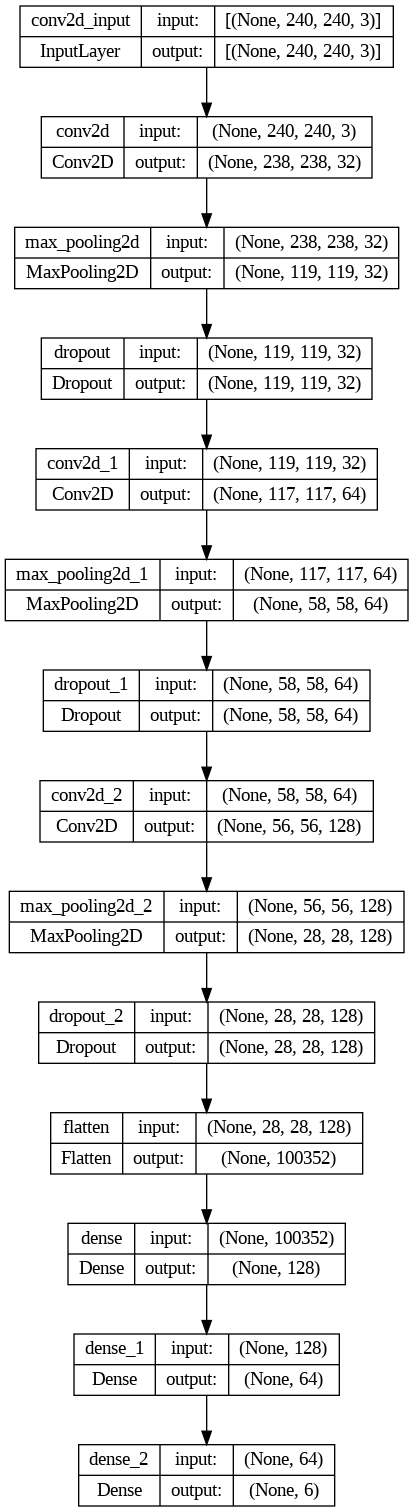

In [ ]:
tf.keras.utils.plot_model(model, to_file="my_model2.png", show_shapes=True)

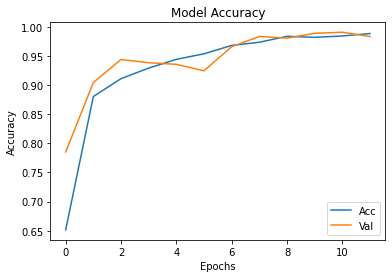

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

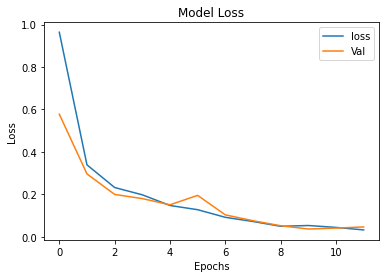

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [ ]:
model.save("/content/drive/MyDrive/model_v3.h5")